In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import clear_output
import time

from sklearn.metrics import confusion_matrix

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

2023-06-24 17:46:33.889986: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 17:46:33.923988: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 17:46:33.924437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 17:46:34.613977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
Test = pd.read_csv("Database/Validation.csv")

In [3]:
XTest = np.array(Test[['PhiNorm','ThetaNorm']])
YTest = np.array(Test['Tipo'])

# Creamos la sesión de tensorflow para predecir

INFO:tensorflow:Restoring parameters from Modelo1.ckpt
[0.98557717]


2023-06-24 17:46:35.399252: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-24 17:46:35.403365: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


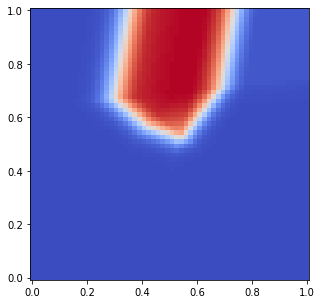

In [4]:
saver = tf.train.import_meta_graph('Modelo1.ckpt.meta')

with tf.Session() as sess:
    
    saver.restore(sess,'Modelo1.ckpt')  
    
    X = sess.graph.get_tensor_by_name('input1:0')
    lout = sess.graph.get_tensor_by_name('strided_slice:0')
    
    Yp = sess.run(lout, feed_dict={X:[[0.5,0.8]]})
    print(Yp)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
        
    N = 60
        
    x = np.linspace(0.,1.,N)
    y = np.linspace(0.,1.,N) 

    Y = np.zeros((N,N))

    for i, _x in enumerate(x):
        for j, _y in enumerate(y):
            Y[i,j] = sess.run(lout,feed_dict={X:[[_x,_y]]})
        
    ax.pcolormesh(x,y,Y.T,cmap='coolwarm')
    
    YPrediction = np.round(sess.run(lout,feed_dict={X:XTest}),0)

In [5]:
YPrediction

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
_YPred = tf.constant(YPrediction, dtype=tf.int32)
_YTest = tf.constant(YTest, dtype=tf.int32)

In [7]:
with tf.Session() as sess:
    Confusion = tf.math.confusion_matrix(_YTest,_YPred, num_classes=2)
    ConfusionMatrix = Confusion.eval(session=sess)
    print(Confusion.eval(session=sess))

[[240  10]
 [  3  47]]


In [8]:
ConfusionMatrix

array([[240,  10],
       [  3,  47]], dtype=int32)

In [24]:
ConfusionMatrix2 = confusion_matrix(YTest,YPrediction)
ConfusionMatrix2

array([[240,  10],
       [  3,  47]])

In [27]:
TP = ConfusionMatrix[0,0]
FP = ConfusionMatrix[0,1]
FN = ConfusionMatrix[1,0]
TN = ConfusionMatrix[1,1] 
print(TP,TN)
print(FP,FN)

240 47
10 3


# En este caso tenemos
## TP = 240, FP = 10
## FN =  3, TN = 47

In [28]:
for i in range(len(YTest)):
    if YTest[i] != YPrediction[i]:
        print(YPrediction[i],YTest[i])

1.0 0
1.0 0
0.0 1
1.0 0
0.0 1
1.0 0
1.0 0
1.0 0
0.0 1
1.0 0
1.0 0
1.0 0
1.0 0


# Precision
## De todo lo clasificado como positivo, ¿Qué es realmente positivo?

# $$ P = \frac{TP}{TP+FP} $$ 

In [29]:
TP = ConfusionMatrix[0,0]
FP = ConfusionMatrix[0,1]
TP,FP

(240, 10)

In [30]:
P = TP/(TP+FP)
P

0.96

# Recall

## De todo lo que es realmente positivo, ¿Qué proporción fue clasificada como positiva?

# $$  R = \frac{TP}{TP+FN} $$ 

In [31]:
R = TP/(TP+FN)
R

0.9876543209876543

Si nos interesa es minimizar la cantidad de falsos positivos, entonces usamos precision
Si nos interesa es minimizar la cantidad de falsos negativos, entonces usamos recall

Si queremos minimizar ambas usamos una combinación de ambas llamada el F-score

$$ F_{\beta} = (1+\beta^{2})\bigg(\frac{PR}{\beta^{2}P + R}\bigg) $$

si $\beta = 0$ es más importante el precision
si $\beta = 0.5$ es más importante el recall
si $\beta = 1$ tienen una ponderación similar

In [35]:
def GetF(P,R,b):
    return (1+b**2)*(P*R/(b*P+R))

In [38]:
F = GetF(P,R,1.0)
F

0.973630831643002

# Extensión a multiclase

Calcularmos las tres métricas para cada una de las categorias, decidiendo cuál vamos a maximizar.

# Curva ROC (receiver operating characteristics)
# Cuva precision-recall